In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('fitbit_data.csv')
data.head()

,date,AZM_minutes,rmssd,nremhr,entropy,sleep_score,deep_sleep_min,resting_heart_rate,stress_score,o2_avg,o2_lower_bound,o2_upper_bound,calories
0,2023-06-29,157.0,67.893931,0.969713,1106.613195,68.0,96.0,58.0,77.0,84.797266,70.70,98.8,2345.97
1,2023-06-30,34.0,63.092575,0.974014,930.920795,65.0,65.0,57.0,80.0,83.358629,93.05,98.4,1772.70
2,2023-07-01,1.0,87.917760,0.967302,1320.889031,85.0,106.0,57.0,86.0,84.843333,86.35,98.6,1669.63
3,2023-07-02,26.0,60.617967,0.971125,950.854017,84.0,90.0,56.0,79.0,84.867290,86.75,98.2,1591.05
4,2023-07-03,44.0,96.207795,0.977133,1310.125747,80.0,78.0,56.0,82.0,83.337220,90.85,97.6,2095.86


In [4]:
data.describe()

,AZM_minutes,rmssd,nremhr,entropy,sleep_score,deep_sleep_min,resting_heart_rate,stress_score,o2_avg,o2_lower_bound,o2_upper_bound,calories
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,52.370861,66.073924,0.967547,895.769586,80.860927,78.496689,59.271523,78.470199,83.483994,87.114349,97.764238,1889.645232
std,47.350412,13.494883,0.008470,224.159308,6.015579,18.435789,2.818827,5.253326,2.465715,9.302653,1.456953,233.930504
min,1.000000,39.054747,0.939544,483.793301,59.000000,6.000000,51.000000,61.000000,76.932317,62.933333,92.900000,1413.980000
25%,11.500000,56.130634,0.961890,742.451011,78.000000,66.000000,58.000000,76.000000,81.777188,84.875000,97.000000,1725.815000
50%,41.000000,64.243988,0.967833,880.659710,82.000000,80.000000,59.000000,79.000000,83.375523,91.050000,97.900000,1856.860000
75%,79.500000,74.562489,0.972464,1016.575328,85.000000,91.000000,61.000000,82.000000,85.430827,93.675000,98.800000,2049.940000
max,187.000000,110.383053,0.987235,1774.991863,92.000000,119.000000,67.000000,92.000000,90.156170,98.400000,100.000000,2580.260000


In [5]:
data.isna().sum()

date                  0
AZM_minutes           0
rmssd                 0
nremhr                0
entropy               0
sleep_score           0
deep_sleep_min        0
resting_heart_rate    0
stress_score          0
o2_avg                0
o2_lower_bound        0
o2_upper_bound        0
calories              0
dtype: int64

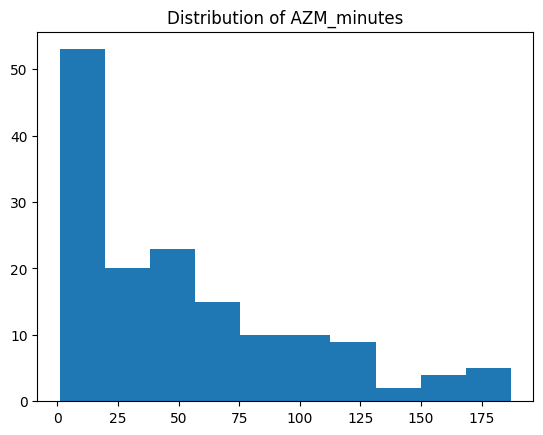

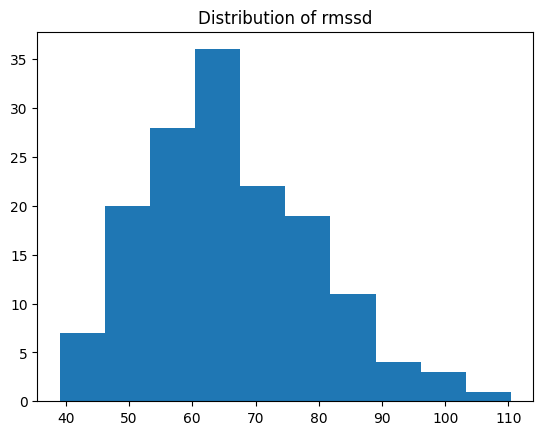

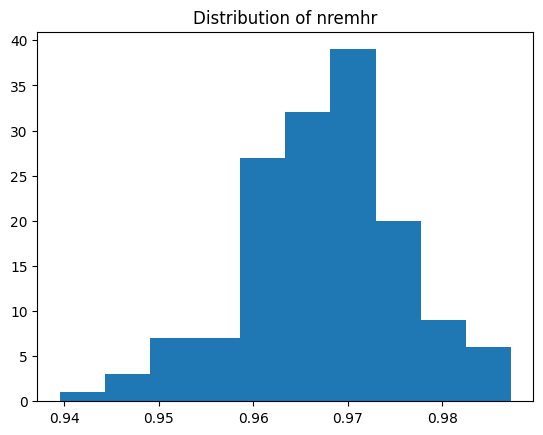

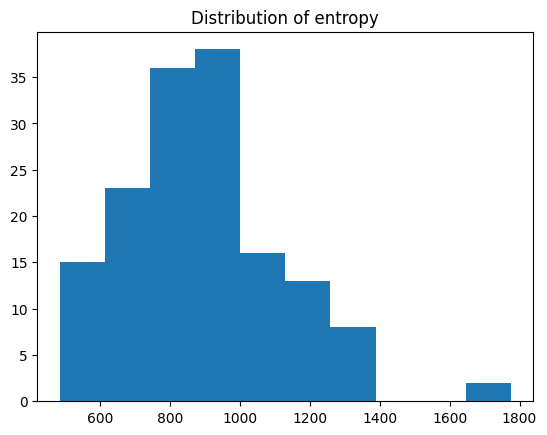

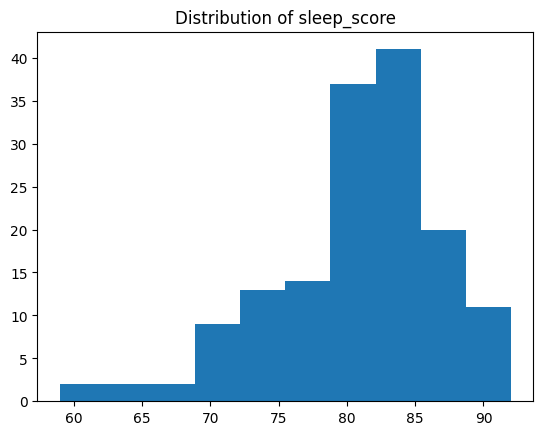

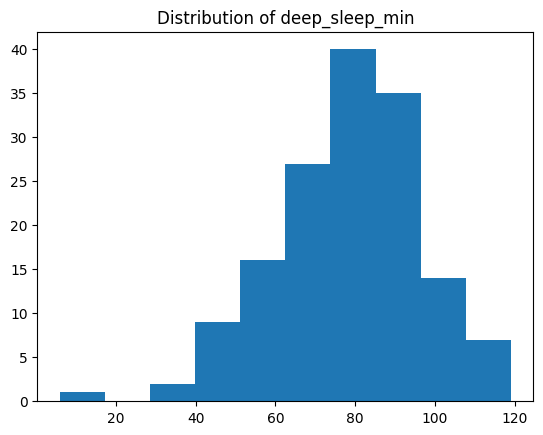

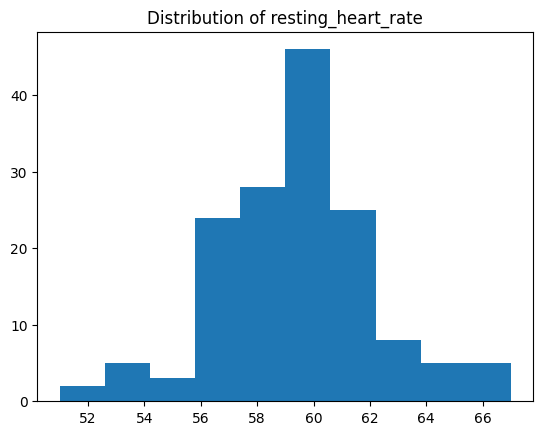

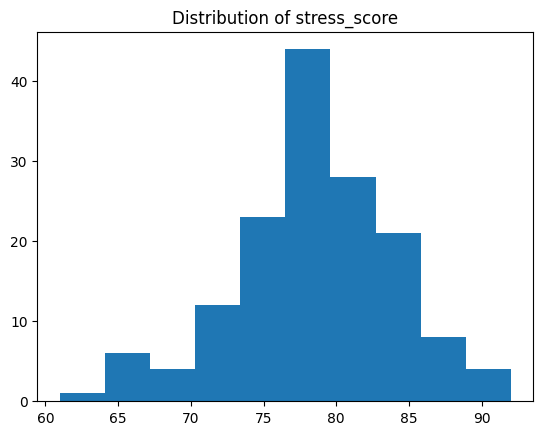

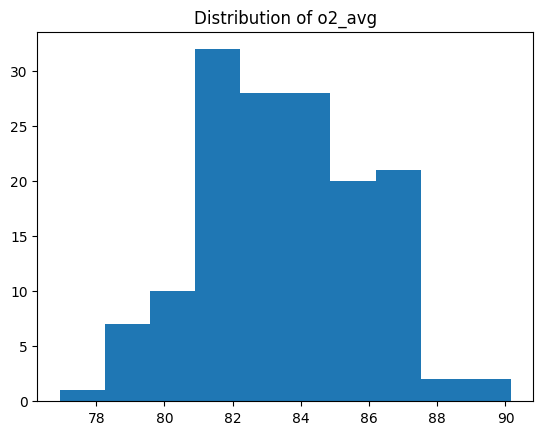

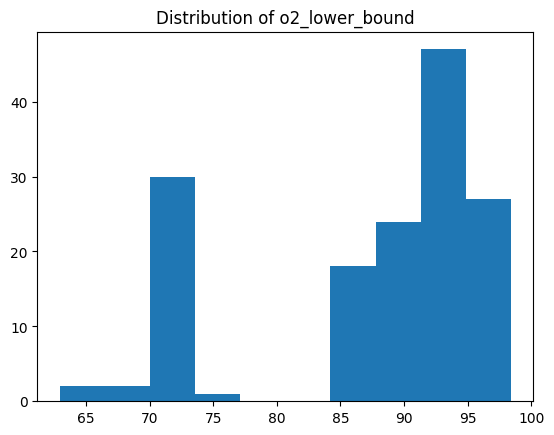

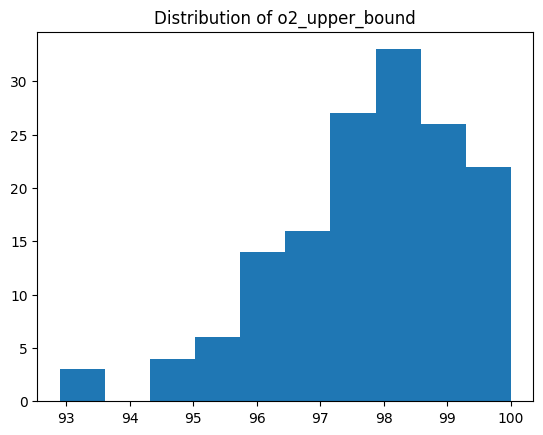

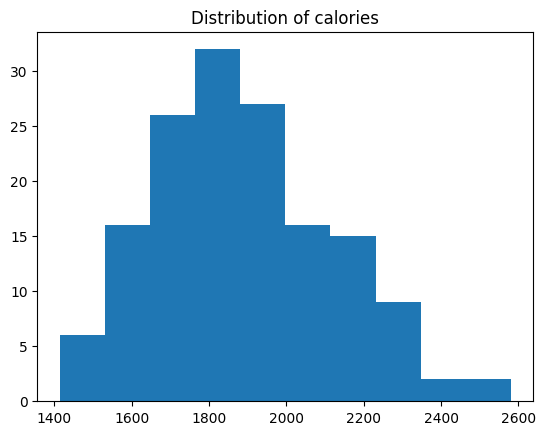

In [6]:
def distribution_plots(data):
    cols = data.select_dtypes(include=['number']).columns

    for c in cols:
        plt.hist(data[c])
        plt.title(f"Distribution of {c}")
        plt.show()

distribution_plots(data)

# Split Train Test data

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['sleep_score', 'date'])
y = data['sleep_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X.shape)
print(y.shape)

(151, 11)
(151,)


# Model 1 : Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [9]:
pipe = Pipeline([
    ('scalar', StandardScaler()),
    ('model', LinearRegression())
])
pipe.fit(X_train, y_train)
coefs = pipe.named_steps['model'].coef_
pd.Series(coefs, index=X_train.columns).abs().sort_values(ascending=False)

rmssd                 2.960388
stress_score          2.528431
entropy               1.509375
calories              1.505168
deep_sleep_min        1.302470
AZM_minutes           1.181567
o2_avg                1.139078
resting_heart_rate    0.594902
nremhr                0.528282
o2_lower_bound        0.418116
o2_upper_bound        0.018558
dtype: float64

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

17.860888798517248


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [11]:
X_train2 = X_train[['rmssd', 'stress_score', 'deep_sleep_min', 'calories', 'o2_lower_bound']]
X_test2 = X_test[['rmssd', 'stress_score', 'deep_sleep_min', 'calories', 'o2_lower_bound']]

model2 = LinearRegression().fit(X_train2, y_train)
y_pred2 = model2.predict(X_test2)
print(mean_squared_error(y_test, y_pred2))

18.877746731983212


# Model 2 : Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
regressor = RandomForestClassifier(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [21]:
oob_score = regressor.oob_score_
print(f"out-of-bag score : {oob_score}")
y_pred3 = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred3)
print(f"MSE {mse}")

r2 = r2_score(y_train, y_pred3)
print(f"R-squared {r2}")

out-of-bag score : 0.06666666666666667
MSE 0.075
R-squared 0.9980451214920791


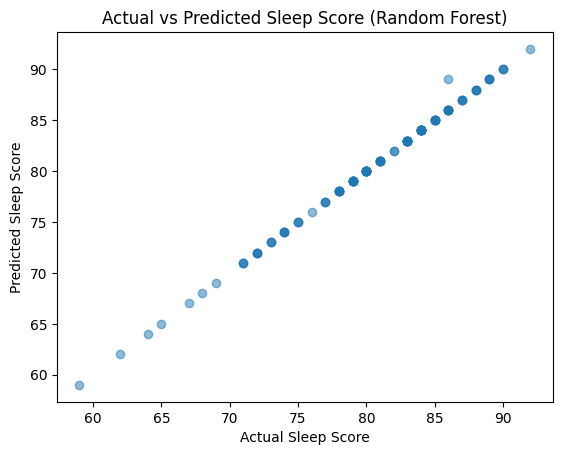

In [22]:
plt.scatter(y_train, y_pred3, alpha = 0.5)
plt.xlabel('Actual Sleep Score')
plt.ylabel('Predicted Sleep Score')
plt.title('Actual vs Predicted Sleep Score (Random Forest)')
plt.show()